<a href="https://colab.research.google.com/github/Dharma-Ranganathan/AllAboutPython/blob/main/DL_Projects_Codes/cifar_10_image_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from keras import datasets
# random state for keras model
tf.random.set_seed(42)

In [4]:
# data collection
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
# check shapes
print(x_train.shape,y_train.shape, ' | ',x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)  |  (10000, 32, 32, 3) (10000, 1)


In [7]:
# train - 50k samples , dim 32 X 32, colored channels 3
# 1st data - 32 X 32 dim, 3 colored channels (rgb)
x_train[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
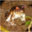

In [8]:
# check 1st sample as numpy
x_train[0]

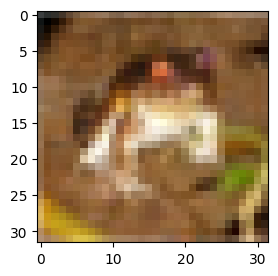

In [13]:
# checking 1st sample as image
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.imshow(x_train[0])

In [21]:
# creating a function to view a image with their respective name labels
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# function to view image with labels
def plot_image(x,y,index):
  plt.figure(figsize=(5,2))
  plt.title(labels[y[index][0]])
  plt.imshow(x[index])

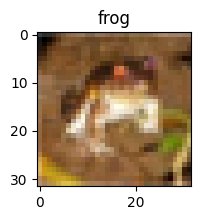

In [22]:
plot_image(x_train,y_train,0)

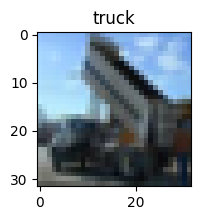

In [23]:
plot_image(x_test,y_test,50)

In [25]:
# normalizing or scaling the image dataset (1 - 255)
x_train = x_train / 255
x_test = x_test / 255


In [26]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [27]:
x_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [28]:
# creating the neural network layers of model
cnn = keras.Sequential([
    # convolutional and max pooling layers - 1
    keras.layers.Conv2D(activation='relu',filters=32,kernel_size=(3,3),input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    # convolutional and max pooling layers - 2
    keras.layers.Conv2D(activation='relu',filters=64,kernel_size=(3,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),

    # dense layers (normal)
    keras.layers.Flatten(),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='softmax')

])

# compiling the model with optimizer (GD), loss function, metrics
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# train the model with training datasets
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 38ms/step - accuracy: 0.3733 - loss: 1.7075
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.5935 - loss: 1.1575
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.6508 - loss: 1.0097
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.6801 - loss: 0.9227
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.7041 - loss: 0.8555
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.7262 - loss: 0.7992
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7437 - loss: 0.7524
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.7581 - loss: 0.7088
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7693 - loss: 0.6711
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7827 - loss: 0.6368


In [30]:
# evaluating our model with test datasets
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6849 - loss: 0.9907


[0.9969057440757751, 0.6841999888420105]

In [31]:
# training - acc : 78 % and loss : 0.63
# testing - acc : 68 % and loss : 0.99

y_pred = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [32]:
# checking the y_pred with labels
y_pred[0]

array([2.8911445e-04, 6.3822983e-05, 7.5936077e-05, 3.9125413e-01,
       2.7242920e-04, 5.3725129e-01, 3.3891909e-02, 1.7782318e-04,
       3.6364004e-02, 3.5955766e-04], dtype=float32)

In [33]:
# importing numpy
import numpy as np


In [35]:
labels[np.argmax(y_pred[0])]

'dog'

In [38]:
labels[y_test[0][0]]

'cat'

In [39]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [40]:
y_pred_labels[:5]

[np.int64(5), np.int64(8), np.int64(8), np.int64(8), np.int64(6)]

In [41]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [44]:
y_test_reshaped = y_test.reshape(-1,)

In [45]:
y_test_reshaped[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [46]:
# classification report for test period
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [48]:
# classification report
print(classification_report(y_test_reshaped,y_pred_labels))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1000
           1       0.82      0.81      0.81      1000
           2       0.67      0.46      0.55      1000
           3       0.59      0.34      0.43      1000
           4       0.56      0.72      0.63      1000
           5       0.62      0.61      0.61      1000
           6       0.63      0.88      0.73      1000
           7       0.74      0.69      0.72      1000
           8       0.71      0.86      0.78      1000
           9       0.77      0.78      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [52]:
# confusion matrix - heat map
heatMap = confusion_matrix(y_test_reshaped,y_pred_labels)

In [51]:
# seaborn
import seaborn as sns

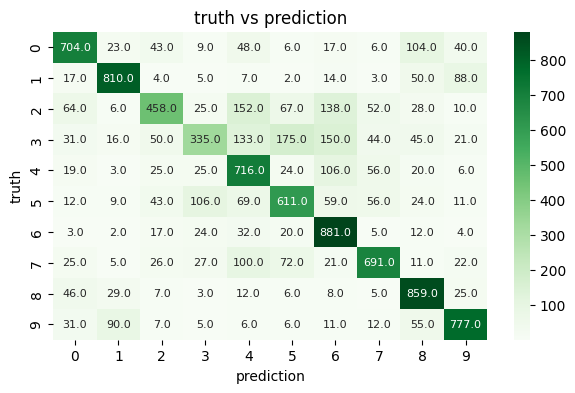

In [66]:
plt.figure(figsize=(7,4))
sns.heatmap(heatMap,annot=True,annot_kws={'size':8},fmt='.1f', cmap='Greens')
plt.title("truth vs prediction")
plt.ylabel('truth')
plt.xlabel('prediction')
plt.show()

key insights based on confusion matrix :
1. out of 1000 labels of 0 (airplane) - 704
2. out of 1000 labels of 1 (cars) - 810
3. out of 1000 labels of 2 (bird) - 458
4. out of 1000 labels of 3 (cat) - 335
5. out of 1000 labels of 4 (deer) - 716
6. out of 1000 labels of 5 (dog) - 611
7. out of 1000 labels of 6 (frog) - 881
8. out of 1000 labels of 7 (horse) - 691
9. out of 1000 labels of 8 (ship) - 859
10. out of 1000 labels of 9 (truck) - 777

**Thanking you...**